In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# Car Driver

In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [4]:
num_bins = 2

bed_days_min = filtered_data['Severity'].min()
bed_days_max = filtered_data['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1848/3125604880.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bed_days_category'] = filtered_data['Severity'].apply(bin_function)


In [5]:
filtered_data['Bed_days_category'].value_counts()

0    12274
1      308
Name: Bed_days_category, dtype: int64

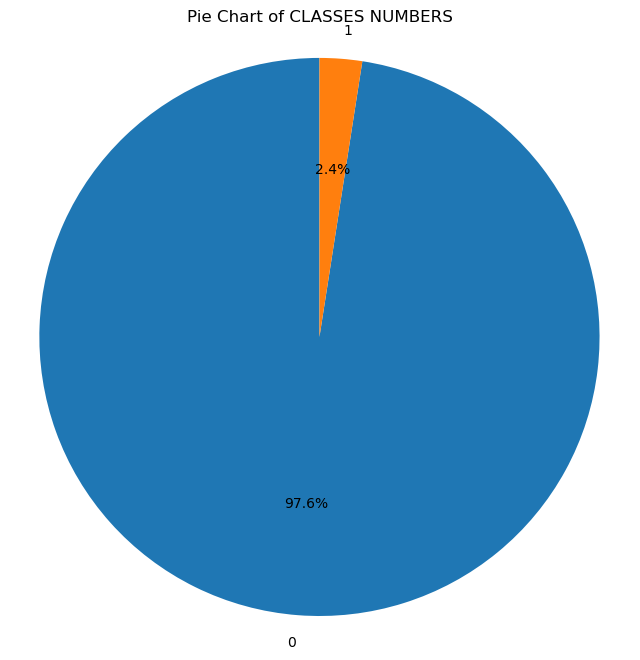

In [6]:
import matplotlib.pyplot as plt

value_counts = filtered_data['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES NUMBERS')
plt.show()

In [7]:
from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9912582781456953
Confusion Matrix:
 [[3671   14]
 [  19   71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3685
           1       0.84      0.79      0.81        90

    accuracy                           0.99      3775
   macro avg       0.92      0.89      0.90      3775
weighted avg       0.99      0.99      0.99      3775

Precision: 0.8352941176470589
Recall: 0.7888888888888889
F1-score: 0.8114285714285714


In [10]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(n_neighbors=3)
X_res, y_res = ncr.fit_resample(X , y)
y_res.value_counts()

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0    12163
1      308
Name: Bed_days_category, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42)

model.fit(X_res, y_res)


# ارزیابی مدل
y_pred_xgb = model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

NameError: name 'X_res' is not defined

In [9]:
y_pred_proba_svm = xgb_model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.4747474747474748
مقدار F1 Score بهترین آستانه: 0.8181818181818183


In [9]:
threshold = 0.4747474747474748

probabilities = xgb_model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)


Accuracy: 0.991523178807947
Confusion Matrix:
 [[3671   14]
 [  18   72]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3685
           1       0.84      0.80      0.82        90

    accuracy                           0.99      3775
   macro avg       0.92      0.90      0.91      3775
weighted avg       0.99      0.99      0.99      3775

Precision: 0.8372093023255814
Recall: 0.8
F1-score: 0.8181818181818183


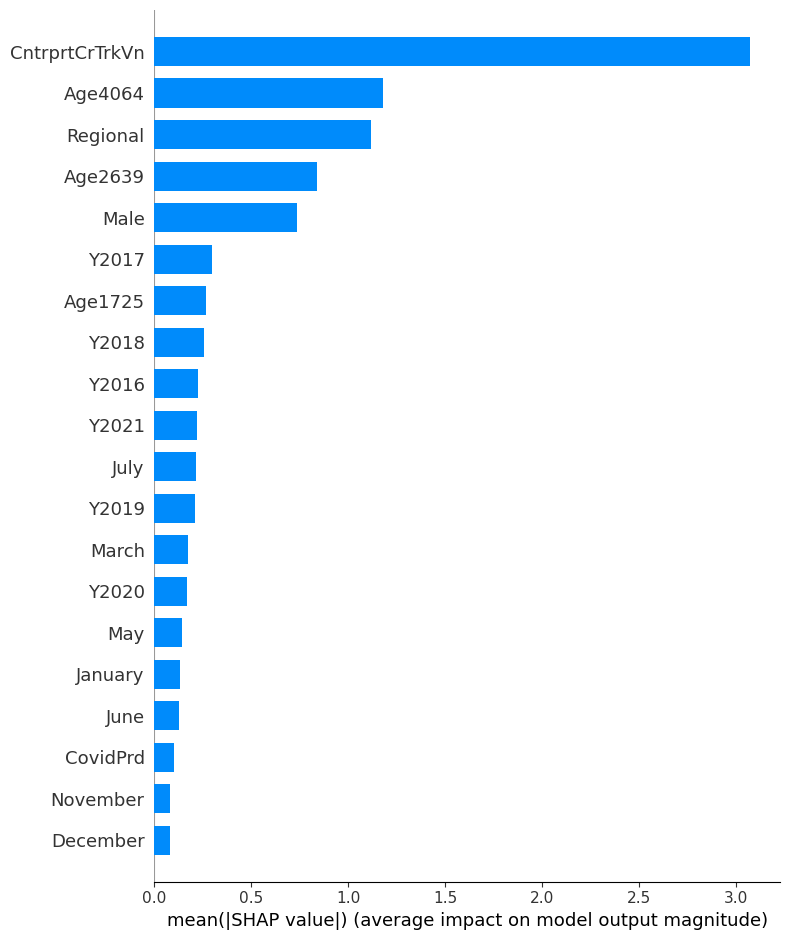

In [10]:
import shap
# Create an explainer for XGBoost model

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

# car passanger

In [11]:
filtered_data2 = data[data['CarPngr'] == 1]
filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11789 entries, 33 to 54030
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11789 non-null  int64  
 1   BedDys           11789 non-null  int64  
 2   BeddystoCC       11789 non-null  float64
 3   Severity         11789 non-null  int64  
 4   DiedCases        11789 non-null  int64  
 5   DiedBdDys        11789 non-null  int64  
 6   Hsptlsns         11789 non-null  int64  
 7   April            11789 non-null  int64  
 8   August           11789 non-null  int64  
 9   December         11789 non-null  int64  
 10  February         11789 non-null  int64  
 11  January          11789 non-null  int64  
 12  July             11789 non-null  int64  
 13  June             11789 non-null  int64  
 14  March            11789 non-null  int64  
 15  May              11789 non-null  int64  
 16  November         11789 non-null  int64  
 17  October    

In [12]:
num_bins = 2

bed_days_min = filtered_data2['Severity'].min()
bed_days_max = filtered_data2['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data2['Bed_days_category'] = filtered_data2['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1848/1634212357.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Bed_days_category'] = filtered_data2['Severity'].apply(bin_function)


In [13]:
filtered_data2['Bed_days_category'].value_counts()

0    11589
1      200
Name: Bed_days_category, dtype: int64

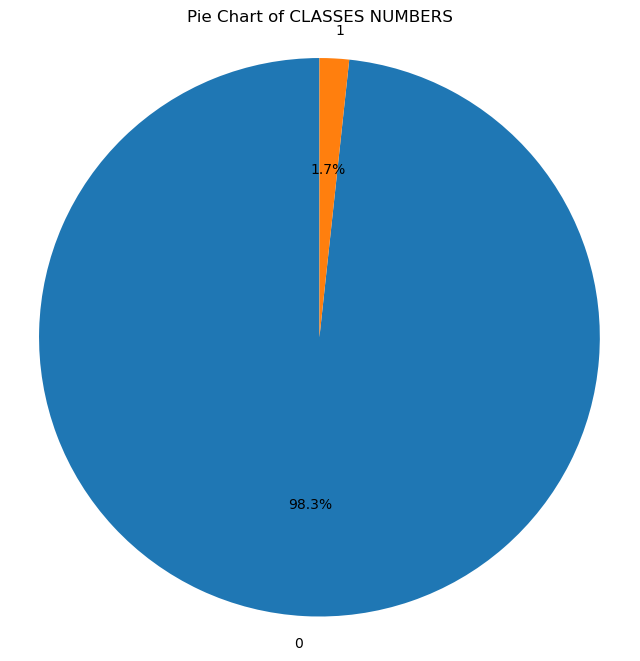

In [14]:

value_counts = filtered_data2['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES NUMBERS')
plt.show()

In [15]:

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data2['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9861464517953068
Confusion Matrix:
 [[3445   20]
 [  29   43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3465
           1       0.68      0.60      0.64        72

    accuracy                           0.99      3537
   macro avg       0.84      0.80      0.81      3537
weighted avg       0.99      0.99      0.99      3537

Precision: 0.6825396825396826
Recall: 0.5972222222222222
F1-score: 0.6370370370370372


# NeighbourhoodCleaningRule method

In [23]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(n_neighbors=3)
X_res, y_res = ncr.fit_resample(X , y)
y_res.value_counts()

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0    11438
1      200
Name: Bed_days_category, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)


y_pred_xgb = model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9882588774341352
Confusion Matrix:
 [[3404   17]
 [  24   47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3421
           1       0.73      0.66      0.70        71

    accuracy                           0.99      3492
   macro avg       0.86      0.83      0.85      3492
weighted avg       0.99      0.99      0.99      3492

Precision: 0.734375
Recall: 0.6619718309859155
F1-score: 0.6962962962962963


In [16]:
y_pred_proba_svm = xgb_model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.14141414141414144
مقدار F1 Score بهترین آستانه: 0.7032967032967034


In [18]:
threshold =0.1414141414141414414

probabilities = xgb_model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)


Accuracy: 0.9847328244274809
Confusion Matrix:
 [[3419   46]
 [   8   64]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3465
           1       0.58      0.89      0.70        72

    accuracy                           0.98      3537
   macro avg       0.79      0.94      0.85      3537
weighted avg       0.99      0.98      0.99      3537

Precision: 0.5818181818181818
Recall: 0.8888888888888888
F1-score: 0.7032967032967034


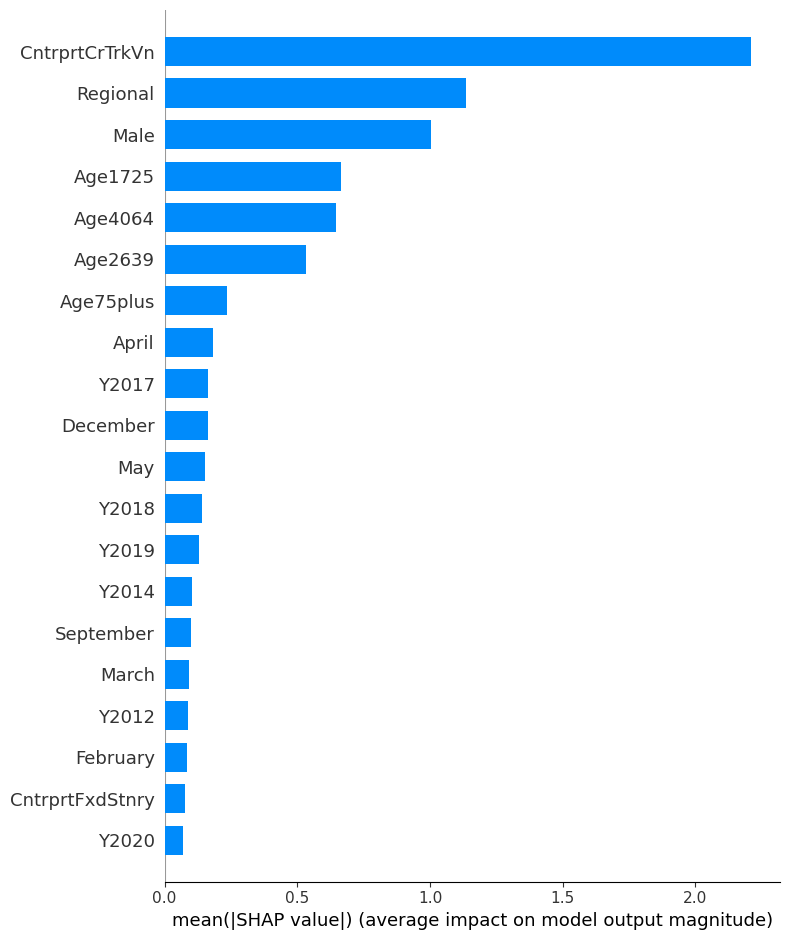

In [19]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_test, plot_type="bar")

# Mtrcyclist

In [17]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [18]:
num_bins = 2

bed_days_min = filtered_data3['Severity'].min()
bed_days_max = filtered_data3['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data3['Bed_days_category'] = filtered_data3['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1848/2234303642.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['Bed_days_category'] = filtered_data3['Severity'].apply(bin_function)


In [19]:
filtered_data3['Bed_days_category'].value_counts()

0    10897
1      330
Name: Bed_days_category, dtype: int64

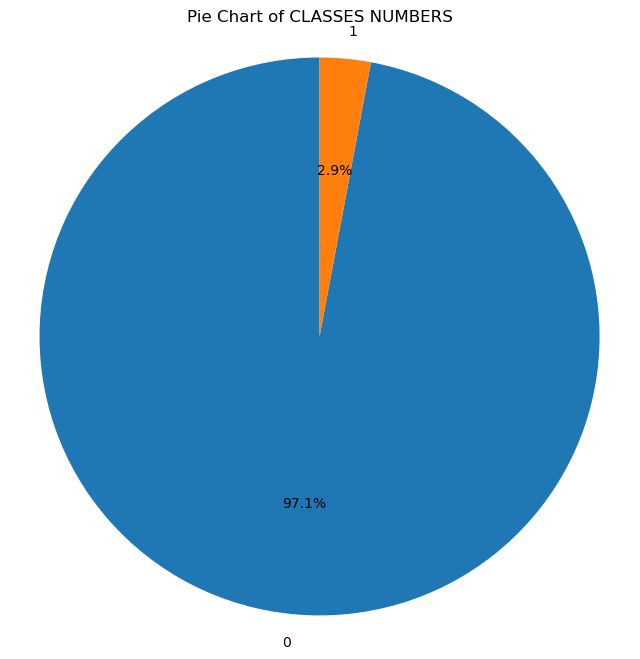

In [20]:
import matplotlib.pyplot as plt

value_counts = filtered_data3['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES NUMBERS')
plt.show()

In [21]:

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data3['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9815969130305728
Confusion Matrix:
 [[3227   24]
 [  38   80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3251
           1       0.77      0.68      0.72       118

    accuracy                           0.98      3369
   macro avg       0.88      0.84      0.86      3369
weighted avg       0.98      0.98      0.98      3369

Precision: 0.7692307692307693
Recall: 0.6779661016949152
F1-score: 0.7207207207207208


In [34]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(n_neighbors=3)
X_res, y_res = ncr.fit_resample(X , y)
y_res.value_counts()

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0    10628
1      330
Name: Bed_days_category, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)


y_pred_xgb = model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9829683698296837
Confusion Matrix:
 [[3146   24]
 [  32   86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3170
           1       0.78      0.73      0.75       118

    accuracy                           0.98      3288
   macro avg       0.89      0.86      0.87      3288
weighted avg       0.98      0.98      0.98      3288

Precision: 0.7818181818181819
Recall: 0.7288135593220338
F1-score: 0.7543859649122807


In [22]:
y_pred_proba_svm = xgb_model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.09090909090909091
مقدار F1 Score بهترین آستانه: 0.7612456747404844


In [27]:
threshold = 0.09090909090909091

probabilities = xgb_model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)


Accuracy: 0.9795191451469278
Confusion Matrix:
 [[3190   61]
 [   8  110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      3251
           1       0.64      0.93      0.76       118

    accuracy                           0.98      3369
   macro avg       0.82      0.96      0.88      3369
weighted avg       0.99      0.98      0.98      3369

Precision: 0.6432748538011696
Recall: 0.9322033898305084
F1-score: 0.7612456747404844


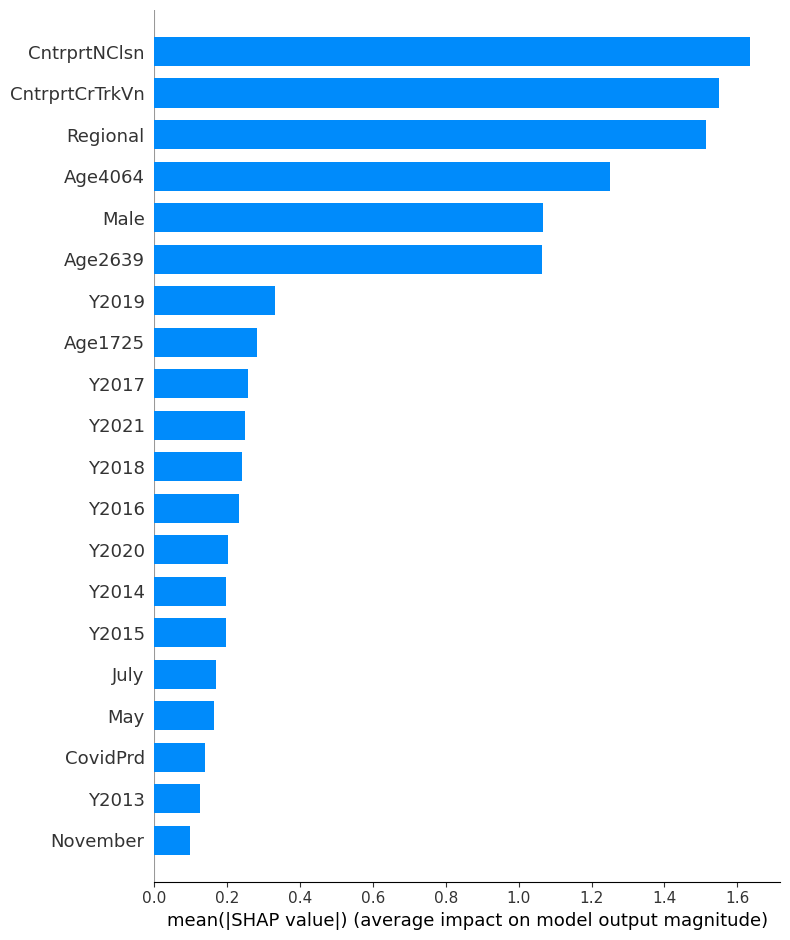

In [28]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_test, plot_type="bar")

# PdlCyclist

In [23]:
filtered_data4 = data[data['PdlCyclist'] == 1]
filtered_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12354 entries, 32 to 54035
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12354 non-null  int64  
 1   BedDys           12354 non-null  int64  
 2   BeddystoCC       12354 non-null  float64
 3   Severity         12354 non-null  int64  
 4   DiedCases        12354 non-null  int64  
 5   DiedBdDys        12354 non-null  int64  
 6   Hsptlsns         12354 non-null  int64  
 7   April            12354 non-null  int64  
 8   August           12354 non-null  int64  
 9   December         12354 non-null  int64  
 10  February         12354 non-null  int64  
 11  January          12354 non-null  int64  
 12  July             12354 non-null  int64  
 13  June             12354 non-null  int64  
 14  March            12354 non-null  int64  
 15  May              12354 non-null  int64  
 16  November         12354 non-null  int64  
 17  October    

In [24]:
num_bins = 2

bed_days_min = filtered_data4['Severity'].min()
bed_days_max = filtered_data4['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data4['Bed_days_category'] = filtered_data4['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1848/2612111887.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data4['Bed_days_category'] = filtered_data4['Severity'].apply(bin_function)


In [25]:
filtered_data4['Bed_days_category'].value_counts()

0    12262
1       92
Name: Bed_days_category, dtype: int64

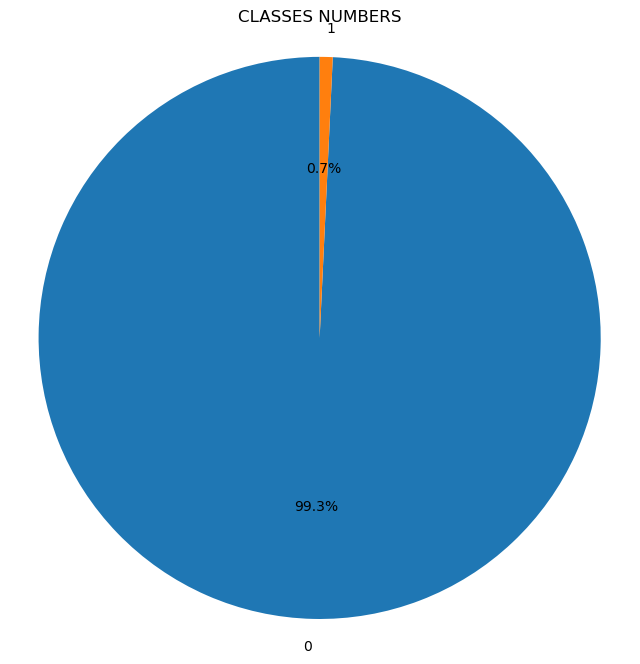

In [26]:
import matplotlib.pyplot as plt

value_counts = filtered_data4['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('CLASSES NUMBERS')
plt.show()

In [27]:
from xgboost import XGBClassifier

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data4['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9981116806042623
Confusion Matrix:
 [[3682    3]
 [   4   18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3685
           1       0.86      0.82      0.84        22

    accuracy                           1.00      3707
   macro avg       0.93      0.91      0.92      3707
weighted avg       1.00      1.00      1.00      3707

Precision: 0.8571428571428571
Recall: 0.8181818181818182
F1-score: 0.8372093023255814


In [28]:
y_pred_proba_svm = xgb_model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.6464646464646465
مقدار F1 Score بهترین آستانه: 0.9


In [34]:
threshold = 0.6464646464646465

probabilities = xgb_model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)


Accuracy: 0.9989209603452927
Confusion Matrix:
 [[3685    0]
 [   4   18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3685
           1       1.00      0.82      0.90        22

    accuracy                           1.00      3707
   macro avg       1.00      0.91      0.95      3707
weighted avg       1.00      1.00      1.00      3707

Precision: 1.0
Recall: 0.8181818181818182
F1-score: 0.9


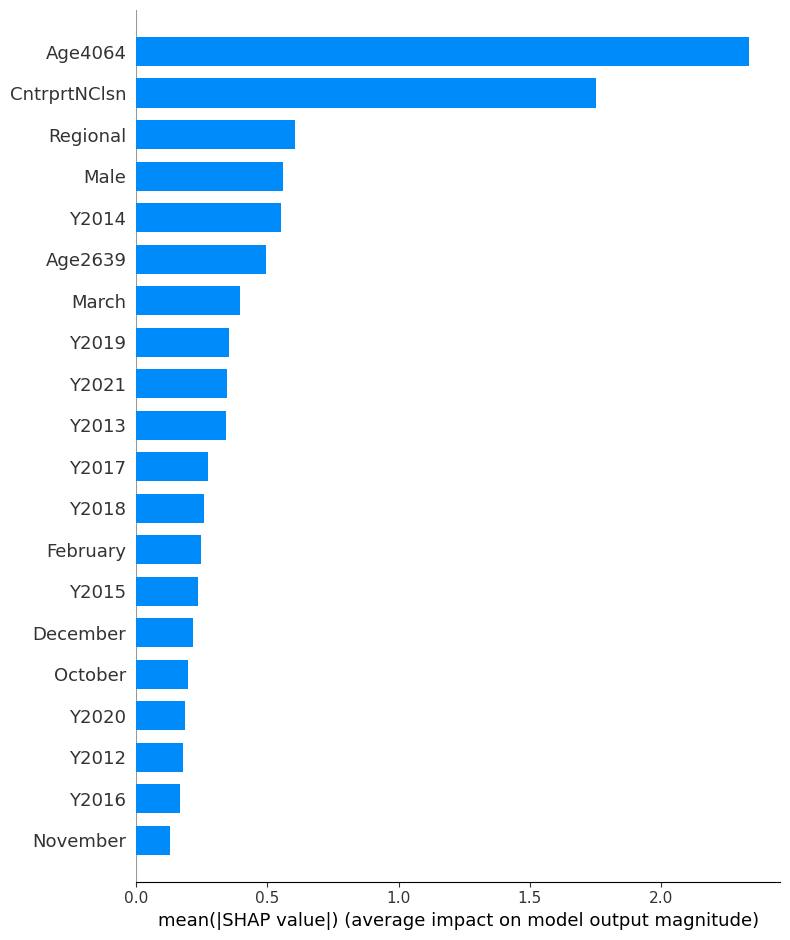

In [35]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_test, plot_type="bar")

# Pedestrian

In [3]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October      

In [4]:
num_bins = 2

bed_days_min = filtered_data5['Severity'].min()
bed_days_max = filtered_data5['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data5['Bed_days_category'] = filtered_data5['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1950/2043418622.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Bed_days_category'] = filtered_data5['Severity'].apply(bin_function)


In [5]:
filtered_data5['Bed_days_category'].value_counts()

0    5944
1     142
Name: Bed_days_category, dtype: int64

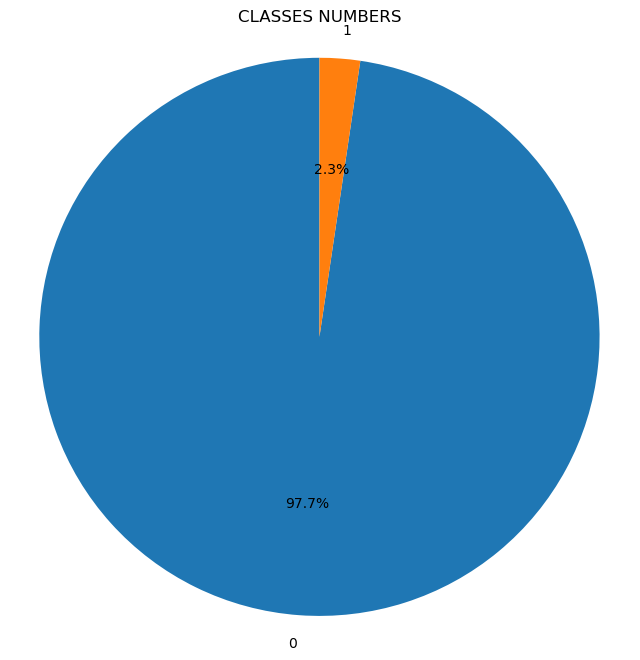

In [6]:
import matplotlib.pyplot as plt

value_counts = filtered_data5['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('CLASSES NUMBERS')
plt.show()

In [7]:
from xgboost import XGBClassifier

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data5['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.975355969331873
Confusion Matrix:
 [[1759   20]
 [  25   22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1779
           1       0.52      0.47      0.49        47

    accuracy                           0.98      1826
   macro avg       0.75      0.73      0.74      1826
weighted avg       0.97      0.98      0.97      1826

Precision: 0.5238095238095238
Recall: 0.46808510638297873
F1-score: 0.49438202247191015


In [8]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(n_neighbors=3)
X_res, y_res = ncr.fit_resample(X , y)
y_res.value_counts()

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0    5813
1     142
Name: Bed_days_category, dtype: int64

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42)

model.fit(X_res, y_res)


# ارزیابی مدل
y_pred_xgb = model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9863088718510405
Confusion Matrix:
 [[1768   11]
 [  14   33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1779
           1       0.75      0.70      0.73        47

    accuracy                           0.99      1826
   macro avg       0.87      0.85      0.86      1826
weighted avg       0.99      0.99      0.99      1826

Precision: 0.75
Recall: 0.7021276595744681
F1-score: 0.7252747252747254


In [10]:
y_pred_proba_svm = model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.393939393939394
مقدار F1 Score بهترین آستانه: 0.7920792079207921


In [13]:
threshold =0.393939393939394

probabilities = model.predict_proba(X_test)

thresholded_predictions = (probabilities[:, 1] >= threshold).astype(int)

acc_thresholded = accuracy_score(y_test, thresholded_predictions)
conf_matrix_thresholded = confusion_matrix(y_test, thresholded_predictions)
class_report_thresholded = classification_report(y_test, thresholded_predictions)

precision_thresholded = precision_score(y_test, thresholded_predictions) 
recall_thresholded = recall_score(y_test, thresholded_predictions)
f1_thresholded = f1_score(y_test, thresholded_predictions)
print('Accuracy:', acc_thresholded)
print('Confusion Matrix:\n', conf_matrix_thresholded)
print('Classification Report:\n', class_report_thresholded)
print('Precision:', precision_thresholded)
print('Recall:', recall_thresholded)
print('F1-score:', f1_thresholded)


Accuracy: 0.988499452354874
Confusion Matrix:
 [[1765   14]
 [   7   40]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1779
           1       0.74      0.85      0.79        47

    accuracy                           0.99      1826
   macro avg       0.87      0.92      0.89      1826
weighted avg       0.99      0.99      0.99      1826

Precision: 0.7407407407407407
Recall: 0.851063829787234
F1-score: 0.7920792079207921


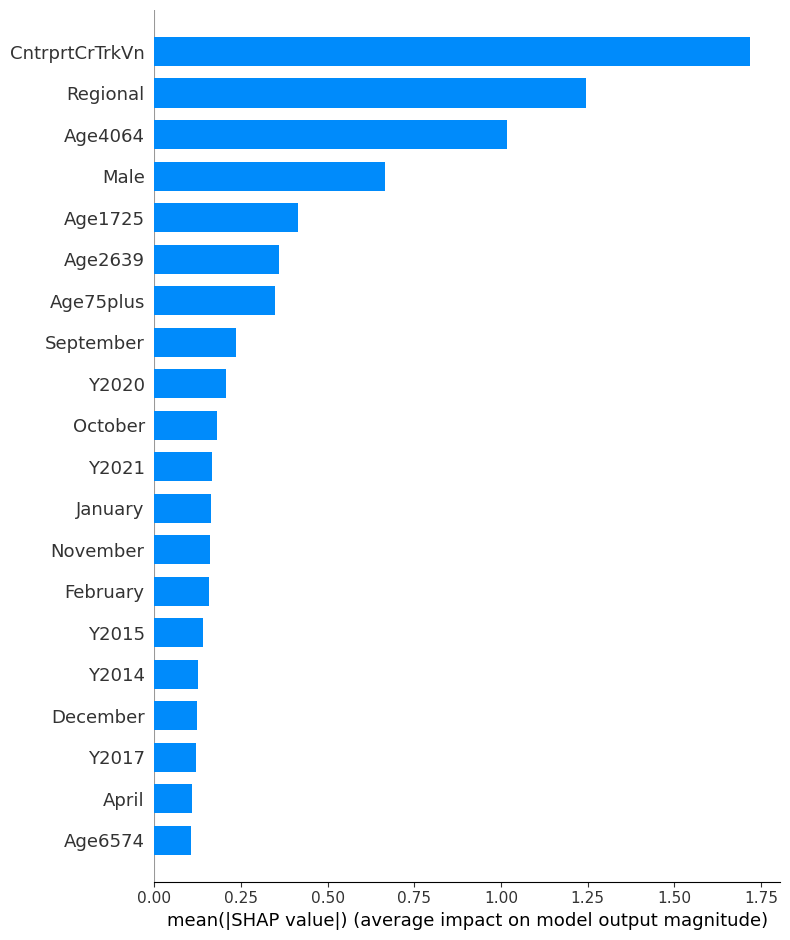

In [65]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_test, plot_type="bar")

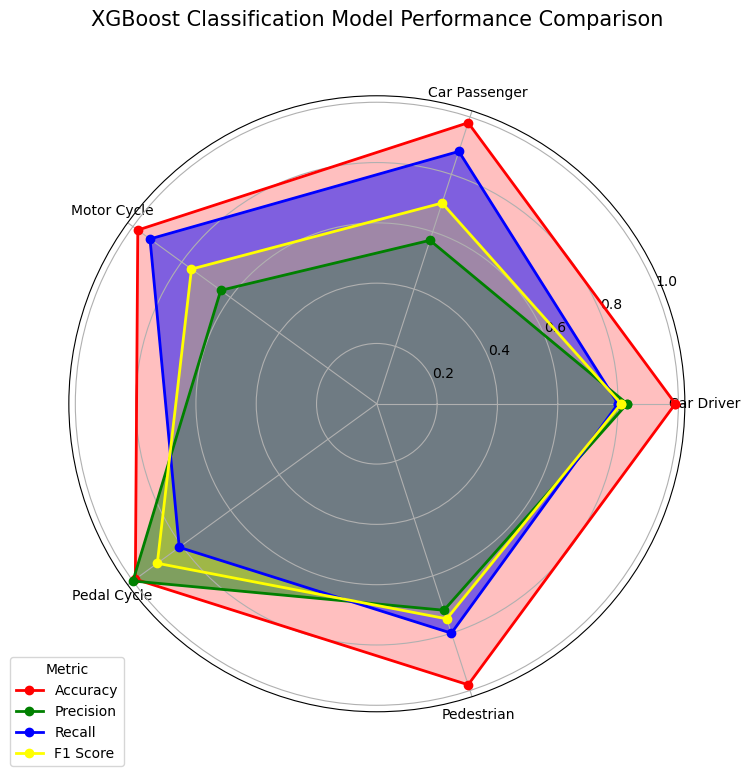

In [6]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = [0.99, 0.98, 0.98, 0.99, 0.98]
precision = [0.83, 0.57, 0.64, 1.0, 0.72]
recall = [0.8, 0.88, 0.93, 0.81, 0.8]
f1_score = [0.81, 0.7, 0.76, 0.9, 0.75]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([accuracy, precision, recall, f1_score])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue', 'yellow']
labels_metric = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'Precision' or label == 'Recall':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25  
    data_slice = np.concatenate([data_slice, [data_slice[0]]])
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])  
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])

plt.title('XGBoost Classification Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


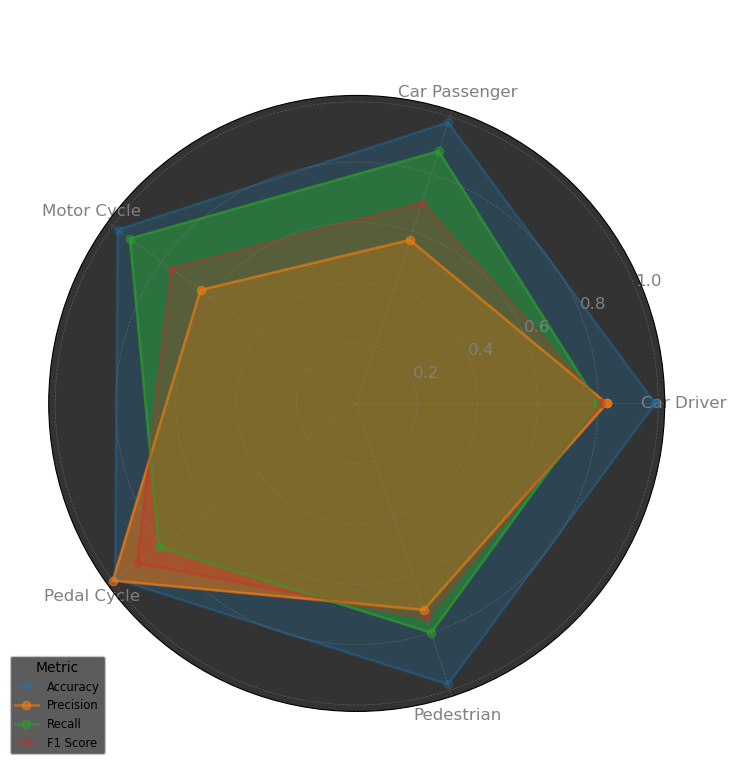

In [8]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = [0.99, 0.98, 0.98, 0.99, 0.98]
precision = [0.83, 0.57, 0.64, 1.0, 0.72]
recall = [0.8, 0.88, 0.93, 0.81, 0.8]
f1_score = [0.81, 0.7, 0.76, 0.9, 0.75]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([accuracy, precision, recall, f1_score])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels_metric = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'Precision' or label == 'Recall':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25  
    data_slice = np.concatenate([data_slice, [data_slice[0]]]) 
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color, alpha=alpha_value)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels, color='grey', size=12)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])  # تنظیم مقیاس محور y
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color='grey', size=12)

ax.set_facecolor('#333333')  

plt.title('XGBoost Model Performance Comparison', size=15, color='white', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize='small', facecolor='#333333')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()
